# Binary Classification in PyCaret

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
path = 'C:\\Users\\bokhy\\Desktop'
df = pd.read_csv(os.path.join(path, 'd2d_transactions.csv'), engine='python')

In [42]:
from pycaret.utils import version
from pycaret.classification import *

In [43]:
version()

2.0


In [48]:
from sklearn.model_selection import train_test_split
df, df_unseen = train_test_split(df, test_size=0.05, random_state=423, shuffle=True)

In [49]:
print('Data for Modeling: ' + str(df.shape))
print('Unseen Data For Predictions ' + str(df_unseen.shape))

Data for Modeling: (13930, 22)
Unseen Data For Predictions (734, 22)


In [5]:
df.shape

(20311, 22)

In [6]:
df.isnull().sum()

title                  0
company_name           0
currency_full_name     0
country_full_name      0
msrp                   0
order_state            0
type                   0
gross_revenue          0
vip_discount           0
vip_discounts          0
payment_date           1
payment_Year           1
payment_Quarter        1
payment_Month          1
payment_Date           1
payment_Hour           1
payment_Minute         1
payment_Second         1
payment_Weeknum        1
payment_Weekdays       1
timeoftheday           1
sold_price            16
dtype: int64

In [7]:
df = df[df.order_state != 'PaypalPayment']

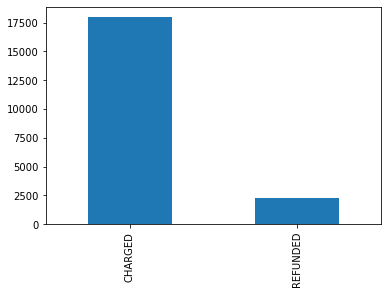

In [8]:
df["order_state"].value_counts().plot.bar(legend=None)

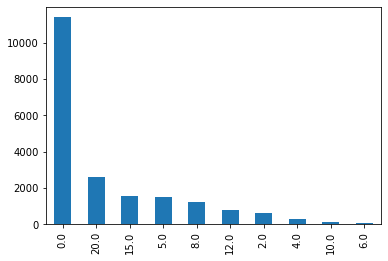

In [9]:
df["vip_discount"].value_counts().plot.bar(legend=None)

In [10]:
categorical_feature = ['title','company_name','currency_full_name','country_full_name','type',
                       'payment_Year','payment_Quarter','payment_Month','payment_Date','payment_Hour','payment_Minute','payment_Second',
                      'payment_Weeknum','payment_Weekdays','timeoftheday','vip_discount']
numeric_feature = ['msrp','gross_revenue','vip_discounts','sold_price']

In [11]:
from imblearn.over_sampling import *
adasyn1 = ADASYN(sampling_strategy='minority')

In [12]:
clf = setup(df, target = 'order_state', session_id=623, log_experiment=False, 
                  experiment_name='test', normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile', 
            #fix_imbalance=True,
                  #fix_imbalance_method= adasyn1,
            categorical_features = categorical_feature,numeric_features = numeric_feature)

Setup Succesfully Completed!


,Description,Value
0,session_id,623
1,Target Type,Binary
2,Label Encoded,"CHARGED: 0, REFUNDED: 1"
3,Original Data,"(20295, 22)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,16
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
best_model = compare_models(blacklist=['catboost'])

IntProgress(value=0, description='Processing: ', max=166)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:31:31
Status,. . . . . . . . . . . . . . . . . .,Evaluating LogisticRegression
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9608,0.9735,0.7594,0.8815,0.8157,0.7939,0.7968,9.0974
1,K Neighbors Classifier,0.9520,0.9499,0.7483,0.8176,0.7809,0.7541,0.7553,11.1143
2,Random Forest Classifier,0.9519,0.9552,0.6886,0.8627,0.7656,0.7392,0.7452,0.5580
3,Gradient Boosting Classifier,0.9472,0.9634,0.6892,0.8208,0.7490,0.7197,0.7234,44.7275
4,Ridge Classifier,0.9452,0.0000,0.6867,0.8060,0.7415,0.7111,0.7140,1.6028
5,Linear Discriminant Analysis,0.9450,0.9498,0.7624,0.7583,0.7603,0.7293,0.7293,34.9177
6,Logistic Regression,0.9445,0.9643,0.7034,0.7896,0.7435,0.7125,0.7143,2.7106
7,Decision Tree Classifier,0.9438,0.8608,0.7533,0.7551,0.7537,0.7220,0.7223,2.4286
8,SVM - Linear Kernel,0.9412,0.0000,0.7165,0.7643,0.7352,0.7024,0.7054,2.5470
9,Ada Boost Classifier,0.9334,0.9550,0.6370,0.7462,0.6864,0.6494,0.6525,17.9412


ValueError: feature_names must be unique

We will choose the model with high precision because here we need to have a high precision than high accuracy or high recalls.
This link will provide you some overview of precision and recall. Link: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

We are creating the random forest classifier because it works really well with these types of dataset. You can have a quick view of the different models using 'compare_models()'

## creating 4 best model from default setup output and tuning them to see improvements

In [14]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9472,0.9703,0.7055,0.8099,0.7541,0.7247,0.7269
1,0.9472,0.9746,0.7607,0.7750,0.7678,0.7380,0.7381
2,0.9402,0.9554,0.6687,0.7786,0.7195,0.6862,0.6887
3,0.9437,0.9597,0.6687,0.8074,0.7315,0.7004,0.7043
4,0.9430,0.9542,0.6810,0.7929,0.7327,0.7010,0.7035
5,0.9402,0.9482,0.6852,0.7655,0.7231,0.6897,0.6910
6,0.9423,0.9710,0.7346,0.7532,0.7438,0.7112,0.7113
7,0.9493,0.9762,0.7222,0.8125,0.7647,0.7364,0.7380
8,0.9458,0.9694,0.7160,0.7891,0.7508,0.7205,0.7215
9,0.9465,0.9636,0.6914,0.8116,0.7467,0.7170,0.7198


In [15]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9585,0.9674,0.7669,0.8562,0.8091,0.7858,0.7873
1,0.9662,0.9857,0.8037,0.8912,0.8452,0.8263,0.8276
2,0.9613,0.9650,0.7546,0.8913,0.8173,0.7958,0.7992
3,0.9641,0.9803,0.7853,0.8889,0.8339,0.8138,0.8158
4,0.9557,0.9527,0.7362,0.8571,0.7921,0.7674,0.7702
5,0.9521,0.9581,0.7099,0.8456,0.7718,0.7453,0.7489
6,0.9634,0.9812,0.7778,0.8873,0.8289,0.8085,0.8107
7,0.9606,0.9834,0.7346,0.9015,0.8095,0.7878,0.7929
8,0.9634,0.9805,0.7654,0.8986,0.8267,0.8063,0.8096
9,0.9627,0.9802,0.7593,0.8978,0.8227,0.8020,0.8056


In [16]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9402,0.9679,0.6564,0.7868,0.7157,0.6826,0.6861
1,0.9536,0.9740,0.7485,0.8299,0.7871,0.7611,0.7624
2,0.9402,0.9520,0.6626,0.7826,0.7176,0.6844,0.6874
3,0.9507,0.9657,0.7055,0.8394,0.7667,0.7394,0.7428
4,0.9402,0.9550,0.6442,0.7955,0.7119,0.6789,0.6836
5,0.9388,0.9499,0.6481,0.7778,0.7071,0.6732,0.6767
6,0.9521,0.9694,0.7222,0.8357,0.7748,0.7482,0.7507
7,0.9521,0.9734,0.7346,0.8264,0.7778,0.7510,0.7527
8,0.9514,0.9594,0.6790,0.8661,0.7612,0.7346,0.7414
9,0.9528,0.9672,0.6914,0.8682,0.7698,0.7439,0.7498


In [17]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9500,0.9713,0.7301,0.8151,0.7702,0.7423,0.7437
1,0.9472,0.9752,0.7730,0.7683,0.7706,0.7408,0.7408
2,0.9423,0.9590,0.6810,0.7872,0.7303,0.6981,0.7004
3,0.9437,0.9560,0.6871,0.7943,0.7368,0.7055,0.7078
4,0.9437,0.9553,0.7055,0.7823,0.7419,0.7104,0.7116
5,0.9381,0.9484,0.7037,0.7403,0.7215,0.6867,0.6870
6,0.9430,0.9699,0.7654,0.7425,0.7538,0.7215,0.7217
7,0.9563,0.9775,0.7531,0.8472,0.7974,0.7730,0.7747
8,0.9415,0.9694,0.7284,0.7516,0.7398,0.7069,0.7070
9,0.9486,0.9645,0.7284,0.8027,0.7638,0.7350,0.7361


In [18]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9543,0.9675,0.7178,0.8603,0.7826,0.7573,0.7612
1,0.9627,0.9803,0.7485,0.9104,0.8215,0.8009,0.8057
2,0.9585,0.9642,0.7239,0.8939,0.8000,0.7771,0.7825
3,0.9634,0.9819,0.7546,0.9111,0.8255,0.8053,0.8097
4,0.9578,0.9605,0.7301,0.8815,0.7987,0.7753,0.7796
5,0.9521,0.9645,0.6728,0.8790,0.7622,0.7362,0.7443
6,0.9599,0.9783,0.7407,0.8889,0.8081,0.7859,0.7899
7,0.9592,0.9712,0.7222,0.9000,0.8014,0.7789,0.7848
8,0.9592,0.9831,0.7160,0.9062,0.8000,0.7776,0.7843
9,0.9641,0.9765,0.7407,0.9302,0.8247,0.8050,0.8115


In [19]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9543,0.9777,0.7362,0.8451,0.7869,0.7614,0.7637
1,0.9564,0.9824,0.7546,0.8483,0.7987,0.7743,0.7760
2,0.9507,0.9699,0.6933,0.8496,0.7635,0.7363,0.7411
3,0.9521,0.9744,0.7117,0.8467,0.7733,0.7468,0.7503
4,0.9514,0.9580,0.6933,0.8561,0.7661,0.7393,0.7445
5,0.9423,0.9659,0.6543,0.8030,0.7211,0.6893,0.6938
6,0.9521,0.9793,0.7037,0.8507,0.7703,0.7438,0.7480
7,0.9528,0.9818,0.7099,0.8519,0.7744,0.7483,0.7522
8,0.9620,0.9735,0.7654,0.8857,0.8212,0.8000,0.8027
9,0.9592,0.9767,0.7284,0.8939,0.8027,0.7802,0.7853


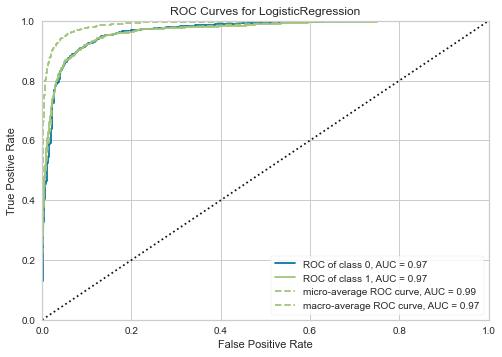

In [20]:
plot_model(tuned_lr)

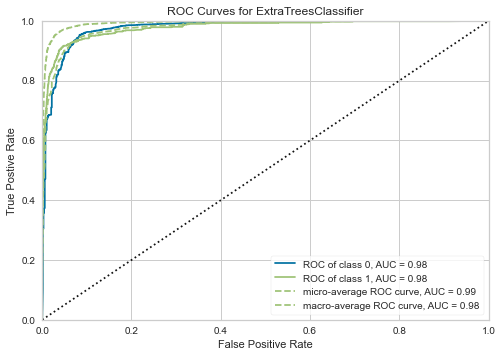

In [21]:
plot_model(tuned_et)

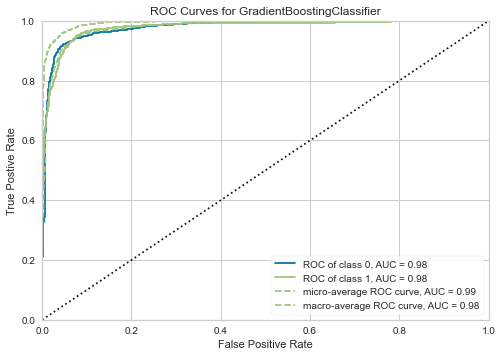

In [22]:
plot_model(tuned_gbc)

## This function creates a Soft Voting(Majority Rule classifier) for the selected estimators in the model

In [23]:
blend_soft = blend_models(estimator_list = [tuned_lr, tuned_et, tuned_gbc], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9571,0.9793,0.7362,0.8696,0.7973,0.7735,0.7769
1,0.9634,0.9859,0.7914,0.8776,0.8323,0.8118,0.8131
2,0.9507,0.9705,0.6871,0.8550,0.7619,0.7348,0.7403
3,0.9557,0.9796,0.7178,0.8731,0.7879,0.7634,0.7680
4,0.9521,0.9628,0.6810,0.8740,0.7655,0.7393,0.7465
5,0.9507,0.9697,0.6975,0.8433,0.7635,0.7363,0.7404
6,0.9620,0.9831,0.7716,0.8803,0.8224,0.8012,0.8034
7,0.9599,0.9817,0.7593,0.8723,0.8119,0.7895,0.7919
8,0.9620,0.9828,0.7654,0.8857,0.8212,0.8000,0.8027
9,0.9563,0.9816,0.7284,0.8676,0.7919,0.7678,0.7714


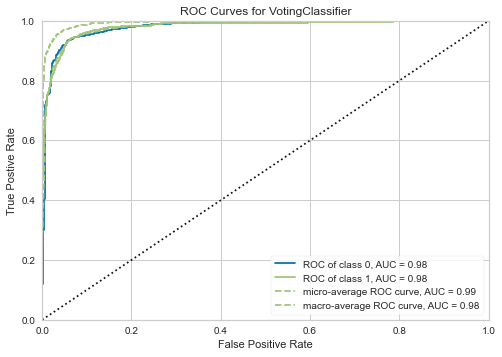

In [24]:
plot_model(blend_soft)

In [ ]:
stacked_lgbm = stack_models(estimator_list = [tuned_lr, tuned_et, tuned_gbc],
                           meta_model=lr)

## Now Comparing best tuned model with blended model

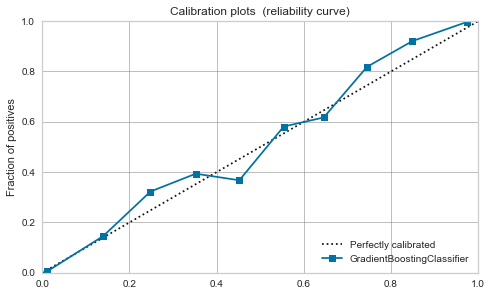

In [26]:
plot_model(tuned_gbc, plot='calibration')

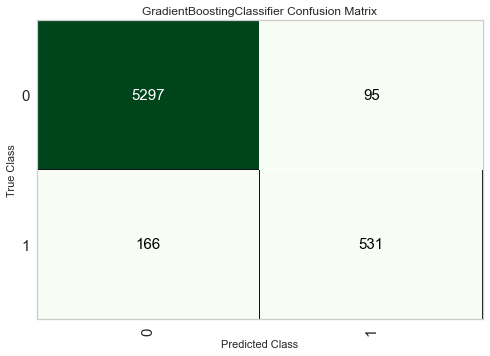

In [27]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

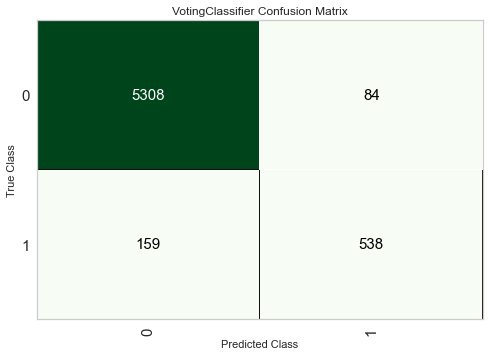

In [28]:
plot_model(blend_soft, plot = 'confusion_matrix')

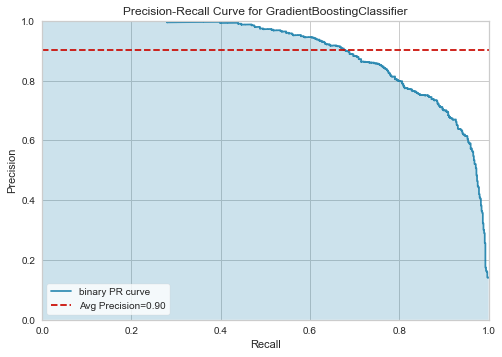

In [29]:
plot_model(tuned_gbc, plot = 'pr')

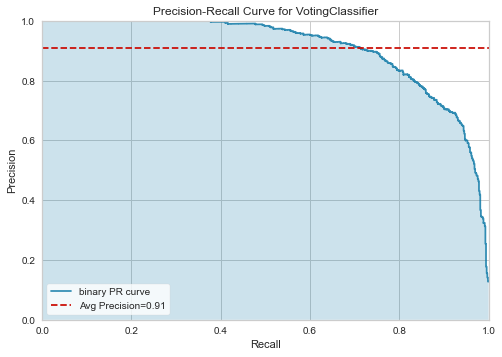

In [30]:
plot_model(blend_soft, plot = 'pr')

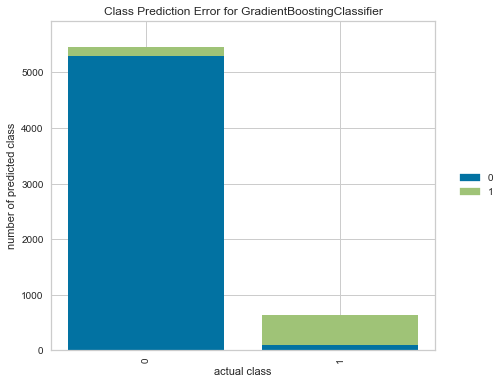

In [31]:
plot_model(tuned_gbc, plot = 'error')

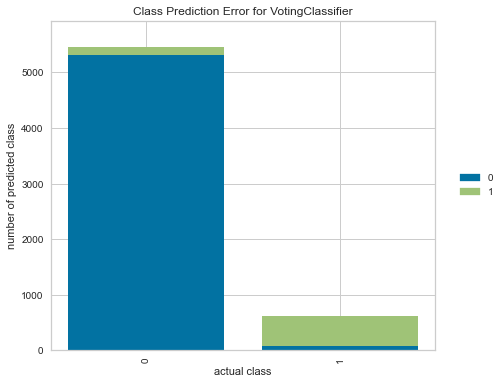

In [32]:
plot_model(blend_soft, plot = 'error')

# Predict on test / hold-out Sample

In [33]:
predict_model(blend_soft);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9601,0.9804,0.7719,0.865,0.8158,0.7935,0.7951


# Finalize Model for Deployment

In [34]:
final_stack_soft = finalize_model(blend_soft)

In [35]:
final_stack_soft

VotingClassifier(estimators=[('Gradient Boosting Classifier_2',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.13,
                                                         loss='deviance',
                                                         max_depth=80,
                                                         max_features='log2',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=4,
                                                         min_samples_split=4,
              

# Predict on unseen data

In [ ]:
unseen_predictions = predict_model(final_stack_soft, data=df_unseen)
unseen_predictions.head()

Notice the last two columns 'Label' and 'Score'. Label is the prediction and score is the probability of the prediction. The predicted results are concatenated to the original dataset while all transformations including imputation of missing values (in this case None), categorical encoding, feature extraction etc. are performed automatically under the hood and you do not have to manage the pipeline manually.

In [ ]:
# Save/Load the experiment

In [ ]:
save_experiment('Experiment_123 08Feb2020')

In [ ]:
saved_experiment = load_experiment('Experiment_123 08Feb2020')

Notice that when load_experiment() was used, it has loaded the entire experiment and all of the intermediate outputs in the variable saved_experiment. You can access specific items in a similar way as you would access list elements in Python. See the example below where we access our final stacking ensembler and store it in the final_stack_soft_loaded variable.

In [ ]:
final_stack_soft_loaded = saved_experiment[57]

In [ ]:
new_prediction = predict_model(final_stack_soft_loaded, data=data_unseen)
new_prediction.head()